In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
#from sklearn.tree import export_graphviz
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import prepare



# Acquire

In [2]:
df1 = pd.read_csv('loan.csv')
df2 = pd.read_csv('loan2.csv')

In [3]:
# combining the two df's into one
df =pd.concat([df1,df2])

In [4]:
df.shape

(981, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [8]:
df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [9]:
df.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [10]:
df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

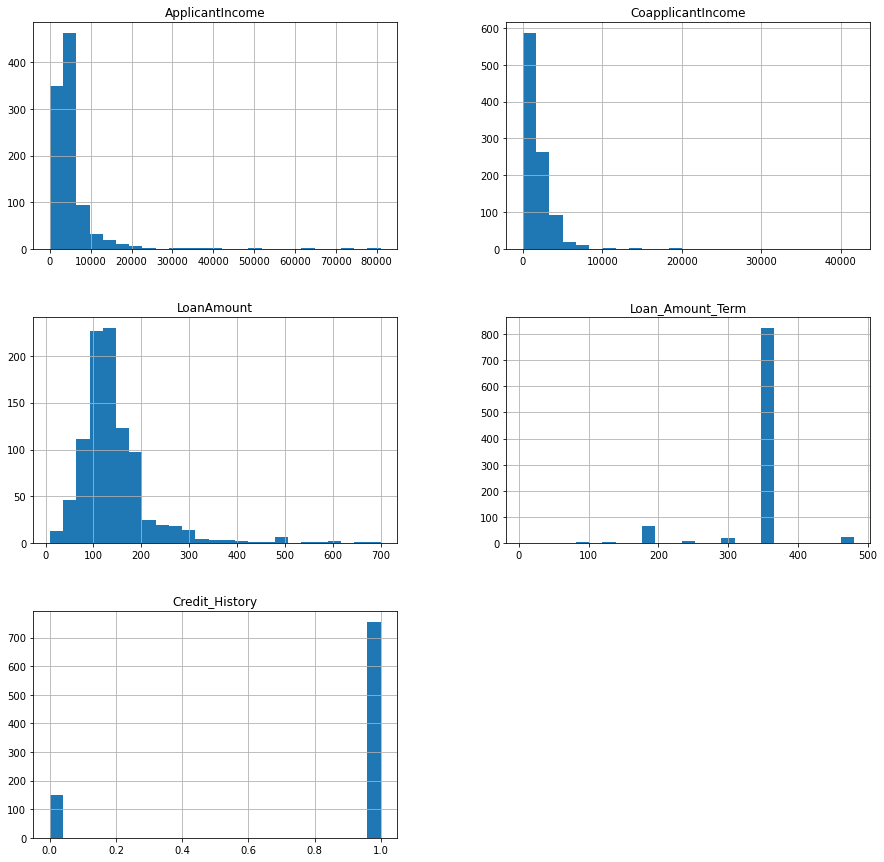

In [11]:
# plot variable distributions
%matplotlib inline 

df.hist(bins=25, figsize=(15,15))
plt.show()

### Takeaways
- I pulled in 2 csv's with 980 rows with each row representing an applicant
- The loan amount is equally distributed
- The applicantincome is right skewed

# Prepare

In [12]:
df = prepare.prep_function(df)

In [13]:
#split number 1
train, validate, test = prepare.train_validate_test_split(df, 'Loan_Status')

In [14]:
# encoding
train, validate, test = prepare.encode(train, validate, test)

In [15]:
# split number 2
train, validate, test, y_train, X_train, y_validate, X_validate, y_test, X_test = prepare.split_2(train, validate, test)

In [17]:
# scaling
X_train, X_validate, X_test = prepare.scaling(X_train, X_validate, X_test)

### Prepare Takeaways
- I split the dataframe into train, validate and test and then into X and y
- I encoded my categorical columns
- I scaled the e